# Problem Statement -

The main goal of this assignment is to develop a predictive model that can accurately classify
toxic comments into one or more toxicity classes in the dataset, using some innovative
methods.

*   Steps involved are -
1.   Data Exploration and Preparation
2.   Feature Extraction
3.   Model Building
4.  Comparing Models and concluding

*   Team Members -  
Vibha Rao , Dibakar Upadayaya, Himanshu Agarwal , Aman Sinha , Subranil Bhattacharya & Eshwar Reddipalli



In [2]:
#MOUNTING GDRIVE

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Code to read csv file into Colab ENVIRONMENT:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#importing training data
link = 'https://drive.google.com/file/d/1qvMmAYGTd4bRNvNNYpyeHJirJUJ1pcKk/view'

import pandas as pd
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train.csv')

train = pd.read_csv('train.csv')
print(train)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [5]:
#importing testing data
link = 'https://drive.google.com/file/d/1oPoMi5rNngxT9yGVGPIhn2eDm8IaeqV7/view'

import pandas as pd
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('test.csv')

test = pd.read_csv('test.csv')
print(test)

                      id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]


# 1.   Data Exploration and Preparation

In [6]:
print(train.columns,train.shape)
target_col= train.columns[2:]
feature_col= train.columns[1:2]
train.head()

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object') (159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
#target_col - contain the column names of the train DataFrame, excluding the first two columns ,  store the names of the target (output) columns
#feature_col -  store the name of the column at index 1 in the train DataFrame.

target_col , feature_col

(Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
        'identity_hate'],
       dtype='object'),
 Index(['comment_text'], dtype='object'))

In [8]:
#DISPLAYS TOP ROWS OF TEST DATAFRAME
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
#sample text to visualize
train.sample(1)['comment_text'].values[0]

'"\n\nYes, I am unblocked now.  Thank you so much, Jaranda.  And just to prove that I\'m gonna work harder on my issues, feel free to block me if I begin to do the same thing again... just please don\'t block me without a real reason )  \'\'\'\'\'\'(talk) "'

In [10]:
# MATPLOTLIB - plotting library in Python
!pip install matplotlib

In [11]:
import matplotlib.pyplot as plt

# 2.   Feature Extraction

Text preprocessing

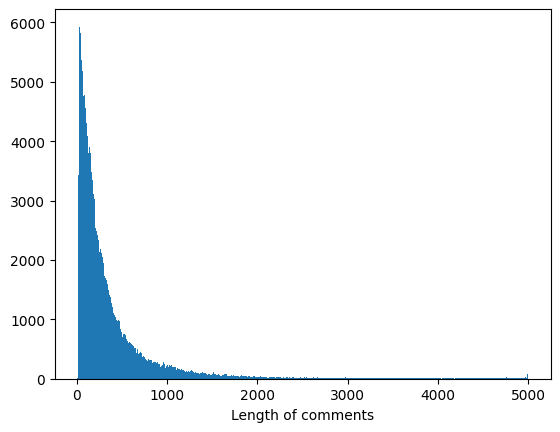

In [12]:
#Length of comments is plotted
sentence_lengths = [len(sentence) for sentence in train['comment_text']]
plt.hist(sentence_lengths,500)
plt.xlabel('Length of comments')
plt.show()

Text(0.5, 0, 'Feature Labels')

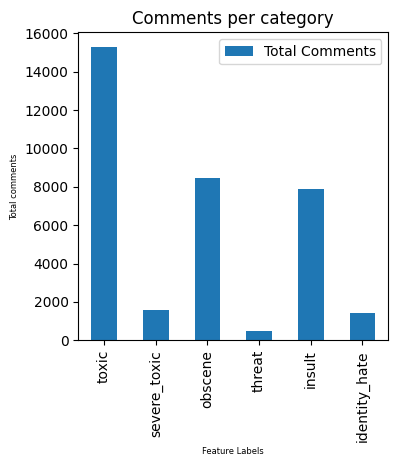

In [13]:
feature = train.drop(['id', 'comment_text'], axis=1)     ### Removed unnecessary columns - id and comment_text
counts = []                                               ### A list that contains tuple which consists of class label and number of comments for that particular class
categories = list(feature.columns.values)
for i in categories:
    counts.append((i, feature[i].sum()))

# COMMENTS PER CATEGORY VS FEATURE LABELS
df_1 = pd.DataFrame(counts, columns=['Feature Labels', 'Total Comments'])   ### Dataframe made up of category and total number of comments
df_1.plot(x='Feature Labels', y='Total Comments', kind='bar',figsize=(4,4))
plt.title("Comments per category")
plt.ylabel('Total comments', fontsize=6)
plt.xlabel('Feature Labels', fontsize=6)

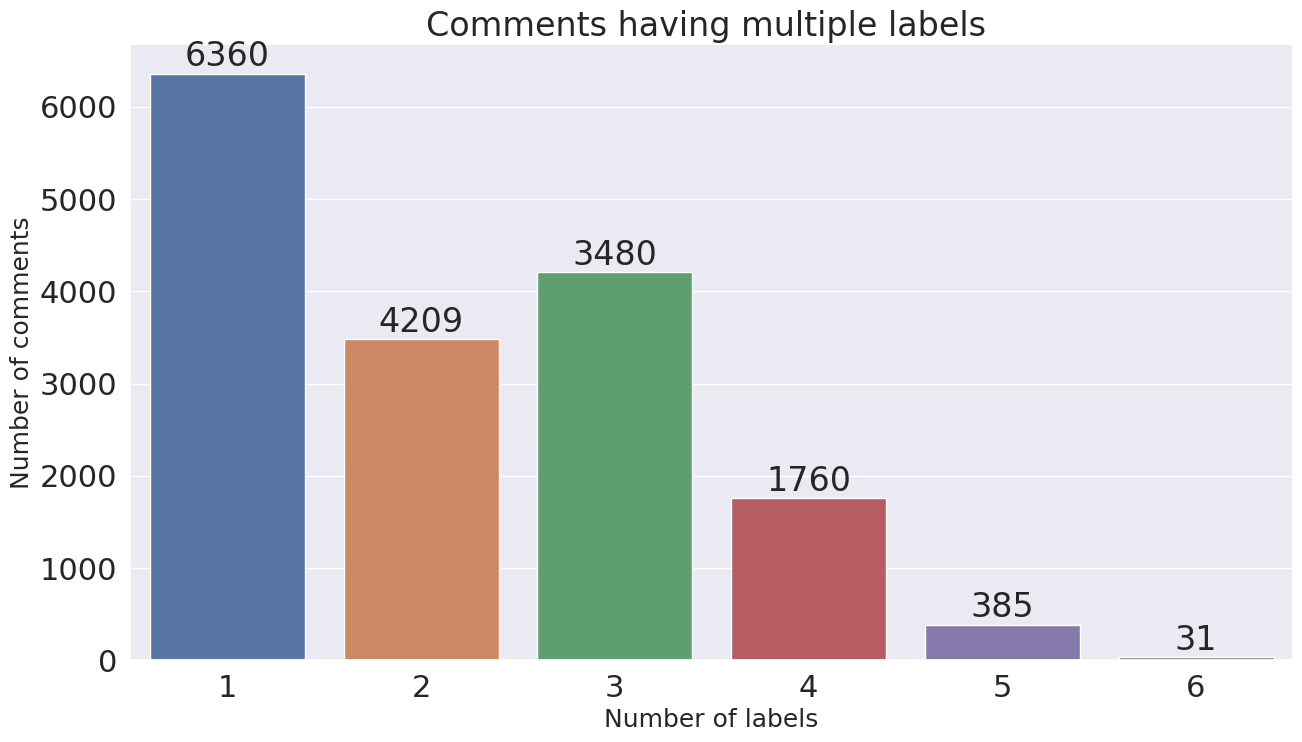

In [77]:
#Comments having multiple labels
rowSums = train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


# NLTK
*   Natural Language Toolkit
*   Python programs to work with human language data (text)


* easy-to-use interfaces and resources for various natural language processing (NLP) tasks, such as tokenization, stemming, lemmatization, part-of-speech tagging, named entity recognition, and more.

# STOPWORDS
*    Stopwords are common words that are often filtered out like "the," "is," "and," etc , which don't carry much meaning and appear frequently in almost all texts.
* By removing stopwords from text data,
we can focus on the more informative words and improve the efficiency of NLP algorithms.





In [80]:
import nltk
from nltk.corpus import stopwords

# Download the set of stopwords if you haven't done it before
nltk.download('stopwords')

# Get the set of English stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


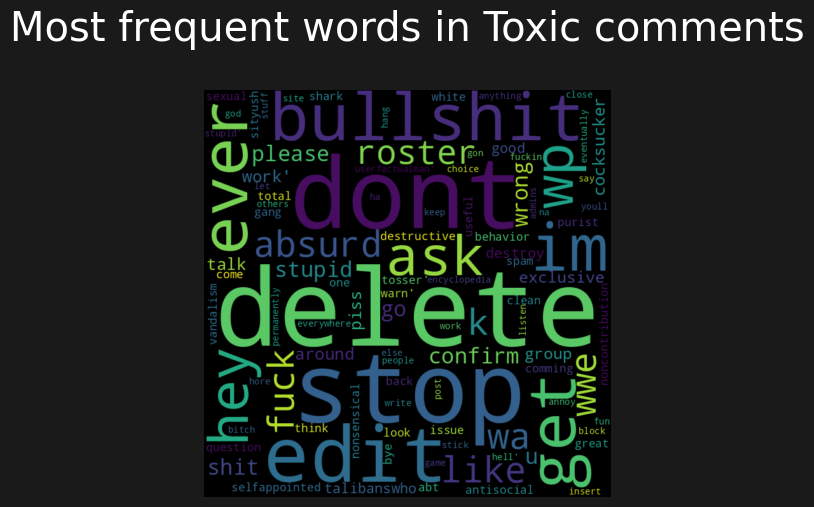

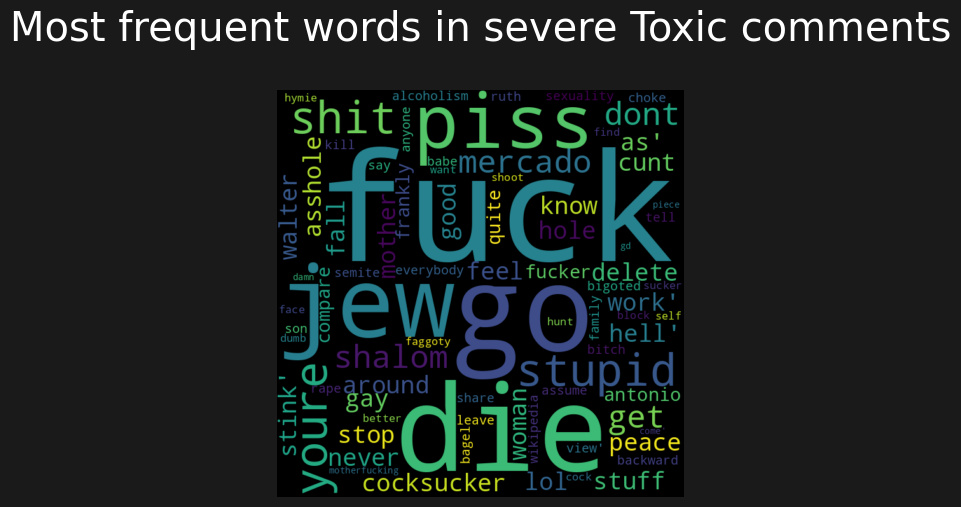

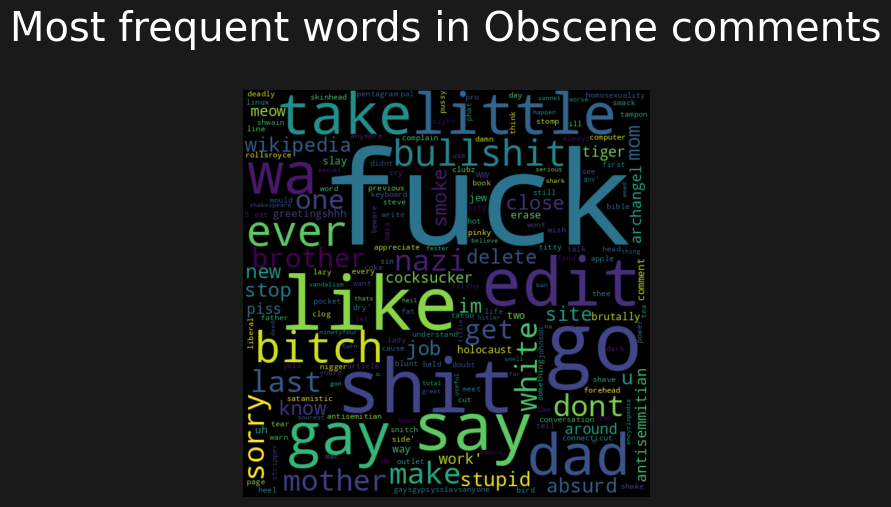

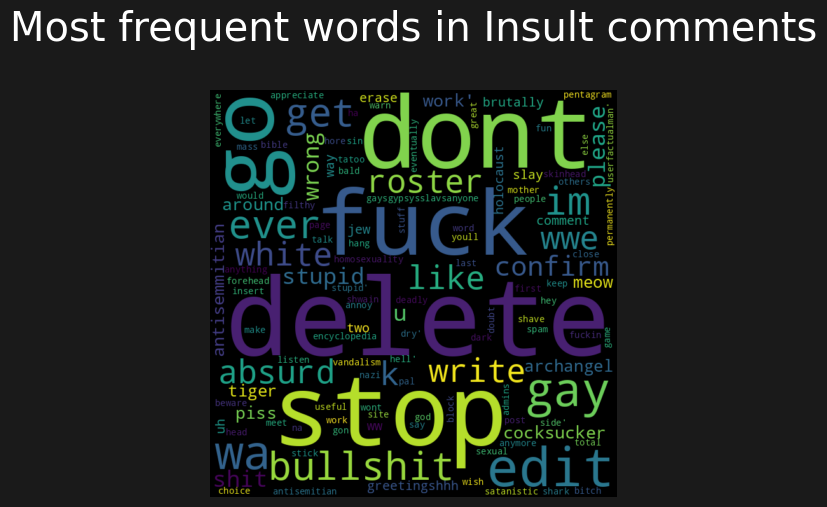

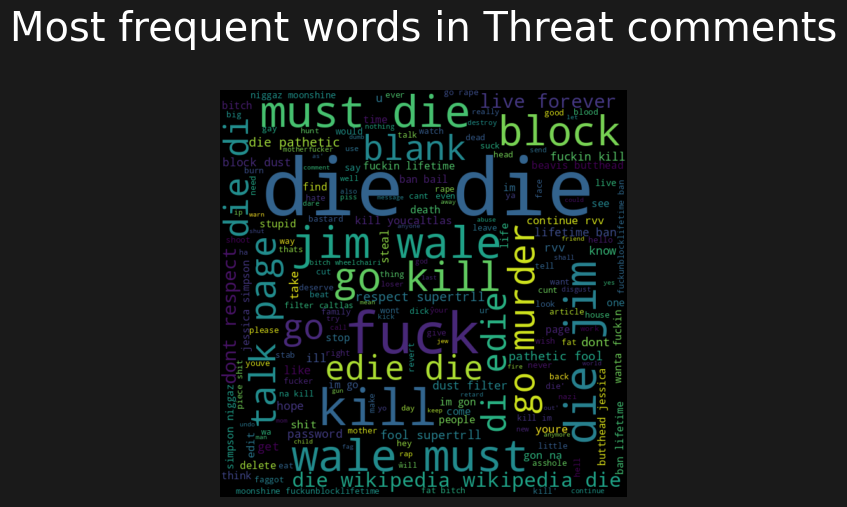

In [81]:
# Most frequent words in the dataset

def word_plot(column,text):

    comments = train['comment_text'].loc[column == 1].values     # sort by toxicity

    word_cloud = WordCloud( width = 640, height = 640, background_color = 'black',
                stopwords = STOPWORDS).generate(str(comments))     # stopwords are a,an,the

    fig = plt.figure( figsize = (8, 5), facecolor = 'k', edgecolor = 'k')
    plt.subplot()
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.suptitle("Most frequent words in " +  text , y = 1.06,color = "white")
    plt.tight_layout(pad = 0)
    plt.axis('off')
    plt.show()

word_plot(train['toxic'], "Toxic comments")
word_plot(train['severe_toxic'],"severe Toxic comments")
word_plot(train['obscene'],"Obscene comments")
word_plot(train['insult'],"Insult comments")
word_plot(train['threat'],"Threat comments")

#TEXTHERO -
open-source library that provides a wide range of
* open-source library that provides a wide range of text preprocessing and text visualization functionalities.
*   It is built on top of popular NLP libraries like NLTK, spaCy, and Gensim.


#TWEETPREPROCESSOR
* Python library specifically designed for preprocessing tweets in the context of natural language processing (NLP)
* Set of tools and functions to clean, normalize, and preprocess tweet text



In [14]:
!pip install texthero #
!pip install tweet-preprocessor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.2/369.2 kB 13.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Could not build wheels for gensim, which is required to install pyproject.toml-based projects


# SEABORN  -  Python data visualization library based on Matplotlib

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
target_col , feature_col

(Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
        'identity_hate'],
       dtype='object'),
 Index(['comment_text'], dtype='object'))

In [17]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


# Gensim
* is an open-source Python library that specializes
in topic modeling and document similarity analysis
* It is designed to work with large text corpora and is particularly useful for tasks like topic extraction, document clustering, and word embedding.



---



In [18]:
!pip install "gensim==4.2.0"
!pip install "texthero==1.0.5"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


# UNIDECODE -
Python library used for transliterating Unicode text into its closest ASCII representation.



In [19]:
!pip install Unidecode

  Using cached Unidecode-1.3.6-py3-none-any.whl (235 kB)


In [20]:
import re
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word
from nltk.corpus import words
nltk.download('words')
import texthero as hero
import re
from texthero import stopwords

from nltk.corpus import wordnet

import tensorflow as tf

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import tensorflow as tf


def lemma_per_pos(sent):
    '''function to lemmatize according to part of speech tag'''
    tweet_tokenizer=TweetTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_list = [lemmatizer.lemmatize(w) for w in  tweet_tokenizer.tokenize(sent)]
    return " ".join(lemmatized_list)

def df_preprocessing(df,feature_col):
    '''
    Preprocessing of dataframe
    '''
    stop = set(stopwords.words('english'))
    df[feature_col]= (df[feature_col].pipe(hero.lowercase).
                      pipe(hero.remove_urls).
                      pipe(hero.remove_digits).
                      pipe(hero.remove_punctuation).
                      pipe(hero.remove_html_tags) )
    # lemmatization
#     df[feature_col]= [lemma_per_pos(sent) for sent in df[feature_col]]
    # df[col_name]= hero.remove_stopwords(df[col_name],custom_stopwords)
    return df

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [21]:
!pip install nltk


# Punkt Tokenizer -
pre-trained unsupervised machine learning model  used for tokenization – the process of splitting text into individual words or sentences, known as tokens.

In [22]:
import re
import string
import html
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download the 'punkt' tokenizer data
nltk.download('punkt')

# Download the 'wordnet' resource
nltk.download('wordnet')

# Define the stop_words list
stop_words = ["the", "and", "is", "in", "to", "a", "it", "of", "that", "I", "this", "for", "on", "with", "you"]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



# Stemming in NLP:
 Stemming is a text normalization technique that reduces words to their
root or base form (called stems) by removing suffixes and prefixes.
The goal is to bring related words to a common form to reduce vocabulary size
and improve text analysis efficiency.


 For example, stemming would convert words
like "running," "runs," and "ran" to their common stem "run."

# Lemmatization in NLP:
Lemmatization is another text normalization technique that transforms words to their base or dictionary form (called lemmas) by removing inflections and variations while preserving the core meaning of the word. Unlike stemming, lemmatization results in valid words, which makes it more linguistically meaningful.


For instance, lemmatization would convert words like "running," "runs," and "ran" to their lemma "run."




 ***Both stemming and lemmatization are used to preprocess text data before NLP tasks like text classification, sentiment analysis, or information retrieval. The choice between stemming and lemmatization depends on the specific use case and the desired level of linguistic accuracy***

In [23]:
def remove_special_chars(text): # REMOVING SPECIAL CHARACTERS LIKE ' & , ETC
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def to_lowercase(text):   #CONVERTING ALL LETTERS TO LOWERCASE
    return text.lower()

def remove_punctuation(text): #Remove punctuation from list of tokenized words
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text): #Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text): #REMOVE WHITESPACES IN DATA
    return text.strip()

def remove_stopwords(words, stop_words):  #STOPWORDS ARE REMOVED HERE
    return [word for word in words if word not in stop_words]

def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def clean_text( text):
    text = remove_special_chars(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

train['comment_text'] = train['comment_text'].apply(lambda x: clean_text(x))
train.sample(1)['comment_text'].values[0]

'december utc'

In [24]:
train['comment_text'][1]

'daww he match background colour im seemingly stick thank talk january utc'

In [25]:
test['comment_text'] = test['comment_text'].apply(lambda x: clean_text(x))

# 3.   Model Building

# 1) BoW (BAG OF WORDS) NLP:
BoW is a text representation technique that treats a document as an unordered collection of words, disregarding grammar and word order.

The process involves two main steps:

* tokenization (breaking text into words or
    tokens)
* counting the occurrences of each word in the document.



In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [27]:
# Creating a Tokenizer object with a vocabulary size of 1000 and an out-of-vocabulary (oov) token 'UNK'
tok = Tokenizer(num_words=1000, oov_token='UNK')

# Fitting the Tokenizer on the 'comment_text' column of the 'train' DataFrame
tok.fit_on_texts(train['comment_text'])

# Converting the text data in 'comment_text' column of the 'train' DataFrame into sequences of integers
x_train = tok.texts_to_sequences(train['comment_text'])

# Converting the text data in 'comment_text' column of the 'test' DataFrame into sequences of integers
x_test = tok.texts_to_sequences(test['comment_text'])

# Determining the vocabulary size based on the number of unique words in the Tokenizer's word_index, and adding 1 to account for the 'UNK' token
vocab_size = len(tok.word_index) + 1
vocab_size

208841

# 2) LSTM (Long Short-Term Memory)  
* is a type of recurrent neural network(RNN) well-suited for processing sequential data like comments.
* Steps: Preprocess comments, tokenize, and pad them for LSTM input.


* designed to effectively model and capture long-range dependencies in sequential data, making it suitable for tasks like sentiment analysis and language modeling.


Calculate the maximum length of sequences in x_train ⬇️

In [28]:
maxlen = max([len(t) for t in x_train])
maxlen

1391

To find the length of the first sequence in the x_train variable ⬇️

In [29]:
len(x_train[0])

38

Used to access the content of the first comment in the 'comment_text'
column of the 'train' DataFrame⬇️

In [30]:
train['comment_text'][0]

'explanation why edit make under my username hardcore metallica fan be revert they werent vandalism just closure some gas after i vote at new york doll fac please dont remove template from talk page since im retire now'

In [31]:
#access the content of the first comment in the 'comment_text' column of the 'train' DataFrame
x_train[0]

[559,
 69,
 19,
 33,
 181,
 15,
 631,
 1,
 1,
 731,
 2,
 128,
 42,
 1,
 210,
 41,
 1,
 56,
 1,
 147,
 3,
 518,
 20,
 121,
 1,
 1,
 1,
 35,
 44,
 86,
 307,
 17,
 28,
 11,
 144,
 64,
 1,
 85]

Calculates the sum of each column (label) in the 'train' DataFrame ⬇️

In [32]:
train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

PAD SEQUENCE - Function is part of the Keras API in TensorFlow and is used for padding sequences.

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [34]:
# Pad the training sequences to a maximum length of 50
training_padded = pad_sequences(x_train,
                                maxlen=50,
                                truncating='post',
                                padding='post'
                               )
# Pad the test sequences to a maximum length of 50
test_padded = pad_sequences(x_test,
                            maxlen=50,
                            truncating='post',
                            padding='post'
                               )

In [35]:
training_padded[0] #retrieves the first padded sequence from the training_padded variable

array([559,  69,  19,  33, 181,  15, 631,   1,   1, 731,   2, 128,  42,
         1, 210,  41,   1,  56,   1, 147,   3, 518,  20, 121,   1,   1,
         1,  35,  44,  86, 307,  17,  28,  11, 144,  64,   1,  85,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [36]:
from tensorflow.keras import models, layers

# Create a Sequential model
model = models.Sequential()

# Add an Embedding layer to map tokenized words to dense vectors
# Input length is set to 50 to handle sequences of maximum length 50 (padded sequences)
model.add(layers.Embedding(vocab_size, 128, input_length=50))

# Add the first LSTM layer with 512 units and dropout regularization
# Return_sequences=True is set to pass the output sequence to the next LSTM layer
model.add(layers.LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

# Add the second LSTM layer with 128 units and dropout regularization
model.add(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a Dense layer with 16 units and ReLU activation
model.add(layers.Dense(16, activation='relu'))

# Add the output layer with 6 units and Sigmoid activation for multi-label classification
model.add(layers.Dense(6, activation='sigmoid'))

# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           26731648  
                                                                 
 lstm (LSTM)                 (None, 50, 512)           1312768   
                                                                 
 lstm_1 (LSTM)               (None, 128)               328192    
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 6)                 102       
                                                                 
Total params: 28,374,774
Trainable params: 28,374,774
Non-trainable params: 0
_________________________________________________________________


The model is trained on the padded training data (training_padded) and the corresponding labels for multi-label classification

In [37]:
history = model.fit(training_padded,
                     train[['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']],
                    epochs=5,
                    batch_size=512,
                   validation_split=0.2)

Epoch 1/5
250/250 [==============================] - 2508s 10s/step - loss: 0.1536 - accuracy: 0.9218 - val_loss: 0.1410 - val_accuracy: 0.9941
Epoch 2/5
250/250 [==============================] - 2489s 10s/step - loss: 0.1413 - accuracy: 0.9942 - val_loss: 0.1410 - val_accuracy: 0.9941
Epoch 3/5
250/250 [==============================] - 2486s 10s/step - loss: 0.1413 - accuracy: 0.9942 - val_loss: 0.1409 - val_accuracy: 0.9941
Epoch 4/5
250/250 [==============================] - 2503s 10s/step - loss: 0.1412 - accuracy: 0.9942 - val_loss: 0.1411 - val_accuracy: 0.9941
Epoch 5/5
250/250 [==============================] - 2445s 10s/step - loss: 0.1413 - accuracy: 0.9942 - val_loss: 0.1411 - val_accuracy: 0.9941


In [38]:
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# matplotlib library to create a line plot of the training and validation loss over the epochs.

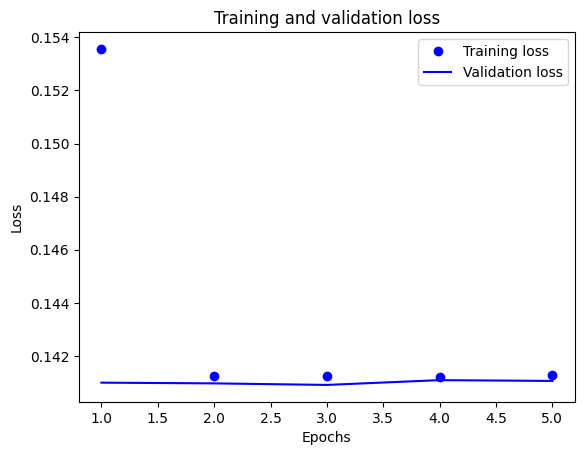

In [39]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# matplotlib to create a line plot of the training and validation accuracy over the epochs.

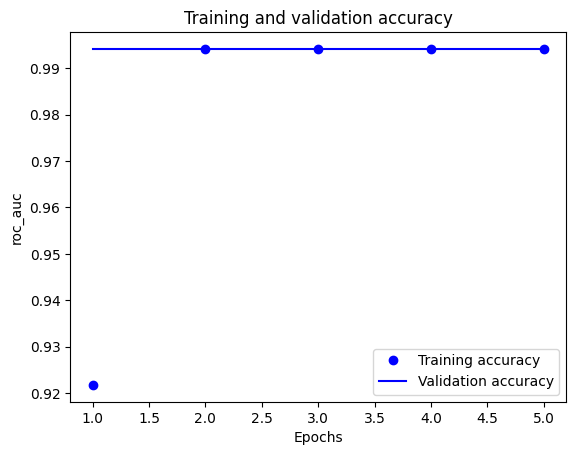

In [40]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('roc_auc')
plt.legend()

plt.show()

# Uses the trained LSTM model to predict the probabilities of each comment in the test dataset ⬇️

In [41]:
preds = model.predict(test_padded)
preds

4787/4787 [==============================] - 1540s 321ms/step


array([[0.09134076, 0.00994167, 0.04961458, 0.00313984, 0.04382383,
        0.00672423],
       [0.09136411, 0.00994306, 0.0496201 , 0.00314059, 0.04382758,
        0.00672452],
       [0.09136411, 0.00994306, 0.0496201 , 0.00314059, 0.04382758,
        0.00672452],
       ...,
       [0.09136395, 0.00994305, 0.04962007, 0.00314058, 0.04382758,
        0.00672452],
       [0.09134334, 0.00994182, 0.04961513, 0.00313991, 0.04382425,
        0.00672426],
       [0.09136411, 0.00994306, 0.0496201 , 0.00314059, 0.04382758,
        0.00672452]], dtype=float32)

In [42]:
test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule more succesful then youll eve...
1,0000247867823ef7,from rfc title fine a imo
2,00013b17ad220c46,source zawe ashton lapland —
3,00017563c3f7919a,if have look back at source information i upda...
4,00017695ad8997eb,i dont anonymously edit article at all


In [43]:
final = pd.DataFrame()
columns = ['toxic' ,'severe_toxic' ,'obscene' ,'threat' ,'insult' ,'identity_hate']
final['id'] = test['id']
final[columns] = preds

In [44]:
final.head() #the prediction of each category using lstm are here.

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.091341,0.009942,0.049615,0.003140,0.043824,0.006724
1,0000247867823ef7,0.091364,0.009943,0.049620,0.003141,0.043828,0.006725
2,00013b17ad220c46,0.091364,0.009943,0.049620,0.003141,0.043828,0.006725
3,00017563c3f7919a,0.091364,0.009943,0.049620,0.003141,0.043828,0.006725
4,00017695ad8997eb,0.091364,0.009943,0.049620,0.003141,0.043828,0.006725


# 3)  TF-IDF Vectorization
* is a popular technique in Natural Language Processing (NLP) for converting text data into numerical features.
*  It represents the importance of each word in a document relative to the entire corpus.  
* used totransform text data into a numerical format suitable for machine learning models.




# IMPORTING NECESSARY LIBRARIES

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

from subprocess import check_output

 extracted the "comment_text" column from the "train" dataframe to the variable "train_comments" and from the "test" dataframe to the variable "test_comments."

In [56]:
train_comments = train['comment_text']
test_comments = test['comment_text']

all_comments = pd.concat([train_comments, test_comments])

train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why edit make under my username ha...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he match background colour im seemingly s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not try edit war it just guy...,0,0,0,0,0,0


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [58]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


Importing the TfidfVectorizer class from the scikit-learn library

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# Set feature extraction to word-level n-grams# Apply sublinear scaling to term frequency
vectorizer = TfidfVectorizer(
    analyzer='word',           #Set feature extraction to word-level n-grams
    sublinear_tf=True,         #Apply sublinear scaling to term frequency
    strip_accents='unicode',   #Strip acents using Unicode characters
    token_pattern=r'\w{1,}',   #Define a token as one or more word characters (letters, numbers, and underscores)
    stop_words='english',      #Remove common English stop words
    ngram_range=(1, 4),        #Consider unigrams up to four-grams (sequences of four words)
    max_features=30000)        #Keep the top 30,000 most important features based on TF-IDF scores

In [61]:
# Printing a message indicating the start of the fitting process
print('Start Fit vectorizer')

# Fitting the TfidfVectorizer on the combined comments data to learn the vocabulary and compute TF-IDF values
tfidf = vectorizer.fit(all_comments)

# Printing a message indicating that the vectorizer fitting process is completed
print('Fit vectorizer')

Start Fit vectorizer
Fit vectorizer


In [62]:
# Printing a message indicating the start of the transformation process for test comments
print('Start transform test comments')

# Transforming the test comments data into TF-IDF features using the fitted TfidfVectorizer
test_comment_features = tfidf.transform(test_comments)

# Printing a message indicating that the transformation process for test comments is completed
print('Transformed test comments')

Start transform test comments
Transformed test comments


In [65]:
# Printing a message indicating the start of the transformation process for train comments
print('Start transform train comments')

# Transforming the train comments data into TF-IDF features using the fitted TfidfVectorizer
train_comment_features = tfidf.transform(train_comments)

# Printing a message indicating that the transformation process for train comments is completed
print('Transformed train comments')

Start transform train comments
Transformed train comments


In [66]:
# Printing the shape of the transformed TF-IDF features for the train comments
print(train_comment_features.shape)
# Printing the shape of the transformed TF-IDF features for the test comments
print(test_comment_features.shape)

(159571, 30000)
(153164, 30000)


In [67]:
# Creating a new pandas DataFrame named "submission" using the 'from_dict' method
submission = pd.DataFrame.from_dict({'id': test['id']})

In [71]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=5533db906cf9a5d0a7d970f18a4e663e65574136f8e24709088bc8929e2221a6
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


In [72]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [75]:

scores = []   # Initialize an empty list to store scores for each label

for label in labels:   # For each label, assign the corresponding label column to 'train_target' (binary classification task)
    train_features = train_comment_features
    train_target = train[label]

    #Create an instance of SGDClassifier with specific hyperparameters
    classifier = SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.001, random_state=42, max_iter=200, tol=None, learning_rate='optimal')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(train_features,train_target,test_size=0.33, random_state=42)

     #Train the classifier on the training data
    classifier.fit(X_train, y_train)
    # Evaluate the classifier's score on the test data
    score = classifier.score(X_test, y_test)

    # Append the score to the 'scores' list
    scores.append(score)
    # Print the score for the current label
    print('score for {} is {}'.format(label, score))
    # Re-train the classifier on the full training data (including the test set)
    classifier.fit(train_features, train_target)
     # Predict probabilities for the test comments using the trained classifier
    submission[label] = classifier.predict_proba(test_comment_features)[:, 1]


# Calculate and print the mean score of all classifiers
print('Total score is {}'.format(np.mean(scores)))

score for toxic is 0.9340283712185952
score for severe_toxic is 0.9898213031010843
score for obscene is 0.9662735714692645
score for threat is 0.9971135038644866
score for insult is 0.9608613912151769
score for identity_hate is 0.9910556600011394
Total score is 0.9731923001449578


In [76]:
# Save the "submission" DataFrame to a CSV file named "submission.csv" without including the index
submission.to_csv('submission.csv', index=False)
# Display the first few rows of the "submission" DataFrame
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.607642,0.104715,0.464275,0.024315,0.408855,0.087531
1,0000247867823ef7,0.042948,0.004527,0.019163,0.001911,0.023925,0.005248
2,00013b17ad220c46,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,00017563c3f7919a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,00017695ad8997eb,0.105129,0.000000,0.045059,0.000299,0.042285,0.000000
